In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part of Train

In [60]:
train_df = pd.read_csv('./train.csv')

In [61]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
train_df = train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [63]:
# train_df['Sex'] = train_df['Sex'].map({'male':1,'female':0})

In [64]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [65]:
train_df.Embarked = train_df.Embarked.fillna(0)

In [66]:
train_df.Embarked = train_df.Embarked.map({'S':0,'C':1,'Q':2})

In [67]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0.0
1,1,1,female,38.0,1,0,71.2833,1.0
2,1,3,female,26.0,0,0,7.9250,0.0
3,1,1,female,35.0,1,0,53.1000,0.0
4,0,3,male,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0.0
887,1,1,female,19.0,0,0,30.0000,0.0
888,0,3,female,NaN,1,2,23.4500,0.0
889,1,1,male,26.0,0,0,30.0000,1.0


<AxesSubplot:>

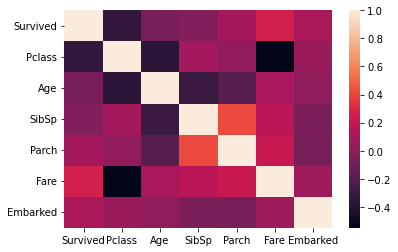

In [68]:
sns.heatmap(train_df.corr())

In [69]:
train_df.Age.isnull().sum()

177

In [70]:
train_df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [71]:
train_df['Age'] = train_df['Age'].fillna(0)

In [72]:
def Age(n):
    if n == 0:
        return train_df.Age.median()
    else:
        return n

In [73]:
train_df.Age = train_df.Age.apply(Age)

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [75]:
train_df.Fare = train_df.Fare.apply(lambda n : float(n))

In [76]:
train_df = pd.get_dummies(train_df)

In [77]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0.0,0,1
1,1,1,38.0,1,0,71.2833,1.0,1,0
2,1,3,26.0,0,0,7.9250,0.0,1,0
3,1,1,35.0,1,0,53.1000,0.0,1,0
4,0,3,35.0,0,0,8.0500,0.0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,0,1
887,1,1,19.0,0,0,30.0000,0.0,1,0
888,0,3,24.0,1,2,23.4500,0.0,1,0
889,1,1,26.0,0,0,30.0000,1.0,0,1


<AxesSubplot:>

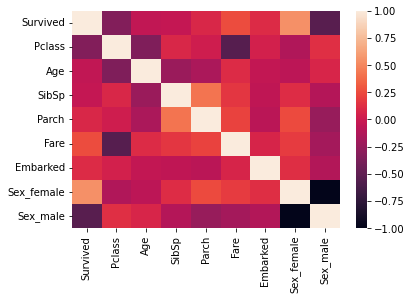

In [78]:
sns.heatmap(train_df.corr())

In [79]:
X_train = train_df.drop('Survived',axis=1)

In [80]:
y_train = train_df['Survived']

In [81]:
y_test = pd.read_csv('./gender_submission.csv')

In [82]:
y_test = y_test.drop('PassengerId',axis=1)

In [83]:
X_train.Embarked = X_train.Embarked.fillna(0)

In [84]:
X_train.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 24.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

# Part of X_test 

In [85]:
X_test = pd.read_csv('./test.csv')

In [86]:
X_test = X_test.drop(['PassengerId','Name','Ticket'],axis=1)

In [87]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [88]:
X_test.Embarked = X_test.Embarked.map({'S':0,'C':1,'Q':2})

In [89]:
X_test.Cabin.isnull().sum()

327

In [90]:
X_test = X_test.drop('Cabin',axis=1)

In [91]:
X_test = pd.get_dummies(X_test)

In [92]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,2,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,2,0,1
3,3,27.0,0,0,8.6625,0,0,1
4,3,22.0,1,1,12.2875,0,1,0
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,0,1
414,1,39.0,0,0,108.9000,1,1,0
415,3,38.5,0,0,7.2500,0,0,1
416,3,NaN,0,0,8.0500,0,0,1


In [93]:
X_test.shape,X_train.shape

((418, 8), (891, 8))

In [94]:
X_test.Age.isnull().sum()

86

In [95]:
X_test.Age = X_test.Age.fillna(0)

In [96]:
X_test.Age = X_test.Age.apply(Age)

In [97]:
X_test.Fare[X_test.Fare==0]

266    0.0
372    0.0
Name: Fare, dtype: float64

In [98]:
def Fare_1(n):
    if n == 0:
        return X_test.Fare.median()
    else:
        return n

In [99]:
X_test.Fare = X_test.Fare.fillna(0)

In [100]:
X_test.Fare = X_test.Fare.apply(Fare_1)

In [101]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   Sex_female  418 non-null    uint8  
 7   Sex_male    418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 20.5 KB


In [102]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0.0,0,1
1,1,38.0,1,0,71.2833,1.0,1,0
2,3,26.0,0,0,7.9250,0.0,1,0
3,1,35.0,1,0,53.1000,0.0,1,0
4,3,35.0,0,0,8.0500,0.0,0,1


In [103]:
X_train.Embarked.unique()

array([0., 1., 2.])

# Creating of model


In [104]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((891, 8), (891,), (418, 8), (418, 1))

In [105]:
from sklearn.preprocessing import StandardScaler

In [148]:
std  = StandardScaler()

In [149]:
X_train_std = std.fit_transform(X_train)

In [150]:
X_test_std = std.transform(X_test)

In [110]:
from sklearn.svm import SVC

In [111]:
model_svc  = SVC() 

In [175]:
model_svc.fit(X_train_std,y_train)

SVC()

In [176]:
y_pred = model_svc.predict(X_test_std)

In [178]:
print(accuracy_score(y_test,y_pred))

0.8899521531100478


In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [130]:
grid = GridSearchCV(model_svc,param_grid=param_grid)

In [131]:
param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]
            ,'kernel':['linear','rbf'],
            'gamma': ['scale', 'auto',]}

In [132]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [179]:
grid.fit(X_train_std,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [180]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [181]:
grid.best_score_

0.8305191136777352

In [141]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [205]:
model_svc_best = SVC(C = 0.5 , gamma='scale', kernel='rbf')

In [206]:
model_svc_best.fit(X_train_std,y_train)

SVC(C=0.5)

In [207]:
y_pred_1 = model_svc_best.predict(X_test_std)

In [208]:
print(accuracy_score(y_test,y_pred_1))

0.9449760765550239
